Here is some code that I used for Neural Network while working through Tariq Rashid's book 'Make Your Own Neural Network'. The purpose of this Neural Network is to classify handwritten numbers, and it uses the MNIST training and test datasets.

In [1]:
import numpy as np
import scipy.special
import scipy.misc
import matplotlib.pyplot
%matplotlib inline

In [2]:
trainingDataFile=open("MNIST datasets/mnist_train.csv",'r')
trainingDataList=trainingDataFile.readlines()
trainingDataFile.close()

In [3]:
testingDataFile=open("MNIST datasets/mnist_test.csv",'r')
testingDataList=testingDataFile.readlines()
testingDataFile.close()

In [4]:
class neuralNetwork:
    
    def __init__(self,inputNodes,hiddenNodes,outputNodes,learningRate):
        self.inodes=inputNodes
        self.hnodes=hiddenNodes
        self.onodes=outputNodes
        self.lr=learningRate
        # Initial weights/defining sigmoid function
        self.inputWeights=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.outputWeights=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        self.activationFunction=lambda x: scipy.special.expit(x)
    
    def train(self,inputsList,targetsList):
        inputs=np.array(inputsList,ndmin=2).T
        targets=np.array(targetsList,ndmin=2).T
        # Hidden layer
        hiddenInputs=np.dot(self.inputWeights,inputs)
        hiddenOutputs=self.activationFunction(hiddenInputs)
        # Output layer
        finalInputs=np.dot(self.outputWeights,hiddenOutputs)
        finalOutputs=self.activationFunction(finalInputs)
        
        outputErrors=targets-finalOutputs
        hiddenErrors=np.dot(self.outputWeights.T,outputErrors)
        
        self.outputWeights+=self.lr*np.dot((outputErrors*finalOutputs*(1-finalOutputs)),np.transpose(hiddenOutputs))
        self.inputWeights+=self.lr*np.dot((hiddenErrors*hiddenOutputs*(1-hiddenOutputs)),np.transpose(inputs))
    
    def query(self,inputsList): 
        inputs=np.array(inputsList,ndmin=2).T
        # Hidden layer
        hiddenInputs=np.dot(self.inputWeights,inputs)
        hiddenOutputs=self.activationFunction(hiddenInputs)
        # Output layer
        finalInputs=np.dot(self.outputWeights,hiddenOutputs)
        finalOutputs=self.activationFunction(finalInputs)
        return finalOutputs

In [5]:
inputNodes=784
hiddenNodes=196
outputNodes=10
lr=0.10
n=neuralNetwork(inputNodes,hiddenNodes,outputNodes,lr)

In [6]:
allValues=testingDataList[0].split(',')
epochs=5

for i in range(epochs):
    for record in trainingDataList:
        allValues=record.split(',')
        inputs=(np.asfarray(allValues[1:])/255*0.99+0.01)
        targets=np.zeros(outputNodes)+0.01
        targets[int(allValues[0])]=0.99
        n.train(inputs,targets)

In [7]:
scorecard=[]
for record in testingDataList:
    allValues=record.split(',')
    correctLabel=int(allValues[0])
    inputs=(np.asfarray(allValues[1:])/255*0.99)+0.01
    outputs=n.query(inputs)
    label=np.argmax(outputs)
    if (label==correctLabel):
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass

In [8]:
print np.mean(scorecard)

0.9733


So, the Neural Network achieved 97.33% accuracy, which is pretty solid considering that it's hard to optimize the network when each iteration takes so long to compute given the number of epochs and nodes. Now, I am going to test the Neural Network on my own handwriting.

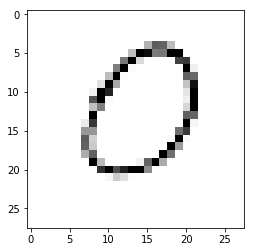

In [9]:
imgArray=scipy.misc.imread('Numbers/0.png',flatten=True)
imgData=255-imgArray.reshape(784)
imgData=(imgData/255*0.99+0.01)
imgArray=np.asfarray((imgData).reshape((28,28)))
matplotlib.pyplot.imshow(imgArray,cmap='Greys',interpolation='None')

In [10]:
np.argmax(n.query((np.asfarray(imgData))))

0

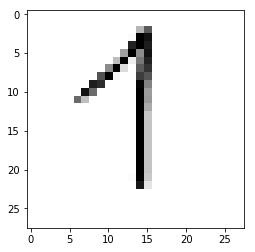

In [11]:
imgArray=scipy.misc.imread('Numbers/1.png',flatten=True)
imgData=255-imgArray.reshape(784)
imgData=(imgData/255*0.99+0.01)
imgArray=np.asfarray((imgData).reshape((28,28)))
matplotlib.pyplot.imshow(imgArray,cmap='Greys',interpolation='None')

In [236]:
np.argmax(n.query((np.asfarray(imgData))))

1

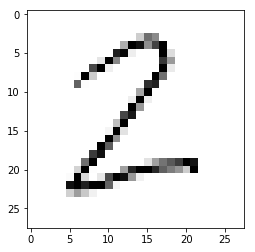

In [241]:
imgArray=scipy.misc.imread('Numbers/2.png',flatten=True)
imgData=255-imgArray.reshape(784)
imgData=(imgData/255*0.99+0.01)
imgArray=np.asfarray((imgData).reshape((28,28)))
matplotlib.pyplot.imshow(imgArray,cmap='Greys',interpolation='None')

In [242]:
np.argmax(n.query((np.asfarray(imgData))))

2

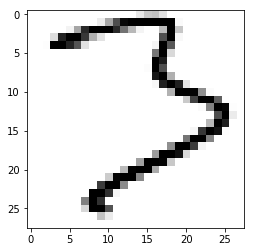

In [204]:
imgArray=scipy.misc.imread('Numbers/3.png',flatten=True)
imgData=255-imgArray.reshape(784)
imgData=(imgData/255*0.99+0.01)
imgArray=np.asfarray((imgData).reshape((28,28)))
matplotlib.pyplot.imshow(imgArray,cmap='Greys',interpolation='None')

In [205]:
np.argmax(n.query((np.asfarray(imgData))))

3

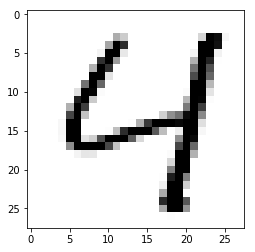

In [206]:
imgArray=scipy.misc.imread('Numbers/4.png',flatten=True)
imgData=255-imgArray.reshape(784)
imgData=(imgData/255*0.99+0.01)
imgArray=np.asfarray((imgData).reshape((28,28)))
matplotlib.pyplot.imshow(imgArray,cmap='Greys',interpolation='None')

In [207]:
np.argmax(n.query((np.asfarray(imgData))))

4

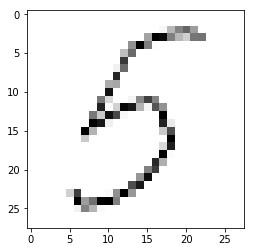

In [243]:
imgArray=scipy.misc.imread('Numbers/5.png',flatten=True)
imgData=255-imgArray.reshape(784)
imgData=(imgData/255*0.99+0.01)
imgArray=np.asfarray((imgData).reshape((28,28)))
matplotlib.pyplot.imshow(imgArray,cmap='Greys',interpolation='None')

In [244]:
np.argmax(n.query((np.asfarray(imgData))))

5

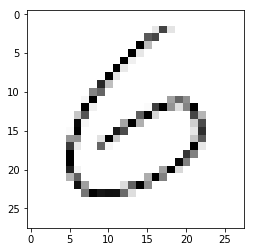

In [251]:
imgArray=scipy.misc.imread('Numbers/6.png',flatten=True)
imgData=255-imgArray.reshape(784)
imgData=(imgData/255*0.99+0.01)
imgArray=np.asfarray((imgData).reshape((28,28)))
matplotlib.pyplot.imshow(imgArray,cmap='Greys',interpolation='None')

In [252]:
np.argmax(n.query((np.asfarray(imgData))))

6

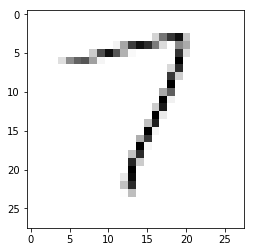

In [247]:
imgArray=scipy.misc.imread('Numbers/7.png',flatten=True)
imgData=255-imgArray.reshape(784)
imgData=(imgData/255*0.99+0.01)
imgArray=np.asfarray((imgData).reshape((28,28)))
matplotlib.pyplot.imshow(imgArray,cmap='Greys',interpolation='None')

In [248]:
np.argmax(n.query((np.asfarray(imgData))))

7

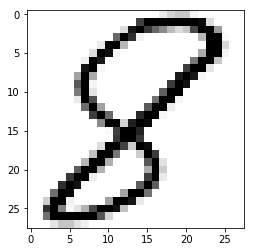

In [214]:
imgArray=scipy.misc.imread('Numbers/8.png',flatten=True)
imgData=255-imgArray.reshape(784)
imgData=(imgData/255*0.99+0.01)
imgArray=np.asfarray((imgData).reshape((28,28)))
matplotlib.pyplot.imshow(imgArray,cmap='Greys',interpolation='None')

In [216]:
np.argmax(n.query((np.asfarray(imgData))))

8

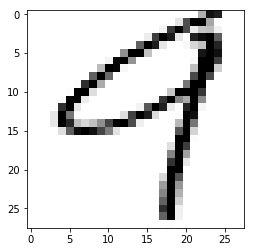

In [217]:
imgArray=scipy.misc.imread('Numbers/9.png',flatten=True)
imgData=255-imgArray.reshape(784)
imgData=(imgData/255*0.99+0.01)
imgArray=np.asfarray((imgData).reshape((28,28)))
matplotlib.pyplot.imshow(imgArray,cmap='Greys',interpolation='None')

In [218]:
np.argmax(n.query((np.asfarray(imgData))))

9

As we can see, the Neural Network succeeded in correctly classifying all of my written numbers.